# Qiskit Basics & Single Qubit Quantum Gates

## Importing necessary libraries

In [1]:
import qiskit
import numpy as np
from qiskit import Aer, QuantumCircuit, execute, ClassicalRegister, QuantumRegister, BasicAer
from qiskit.visualization import plot_bloch_multivector # Plotting the Bloch Sphere for Single Qubits
from qiskit.visualization import plot_histogram # 2D Histogram
from math import pi, sqrt # pi = 3.14 and square root operation

## Printing the Qiskit Version

In [3]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.22.2', 'qiskit-aer': '0.11.1', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.39.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

## Accessing Aer and BasicAer Backends List 

In [4]:
Aer.backends() # Aer has C++ code in its backend

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [5]:
BasicAer.backends() # Python simulators (Python code in backend)

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

## Initializing a Quantum Circuit

In [6]:
# Initializing quantum circuit
cr = ClassicalRegister(1, "cr")
qr = QuantumRegister(1,"qr") #Quantum Register with a single qubit
qc = QuantumCircuit(qr,cr) #Quantum Circuit
qc.draw()

qr: 
    
cr:

#### Basic Qiskit Information

- **All qubits in Qiskit starts from the state |0> by default**
- **Qiskit uses little endian ordering system for both classical bit and quantum bit ordering. This means that for 3 qubits $q_0$, $q_1$ & $q_2$, the qiskit ordering is reversed as $q_2$, $q_1$ & $q_0$. Same is for classical bits as well.**

## Pauli X Gate

In [8]:
# X-gate on a |0> qubit
qr_x = QuantumRegister(1,"qr") #Quantum Register with a single qubit
qc_x = QuantumCircuit(qr_x) #Quantum Circuit
qc_x.x(qr_x[0]) # X Gate on 1st Qubit
#qc.save_statevector()
#qc.save_unitary()
qc_x.draw()

┌───┐
qr: ┤ X ├
    └───┘

### Plotting the Bloch Sphere for Pauli X


Quantum state is: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


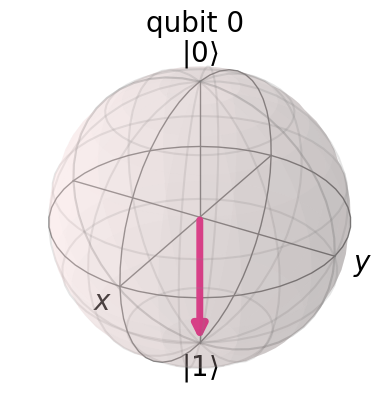

In [4]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = execute(qc_x, backend).result().get_statevector(qc_x, decimals=3)

# Printing the state after X gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

### Printing the Unitary Operator for Pauli X

In [9]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
x_unitary = execute(qc_x, backend)
x_unitary.result().get_unitary(qc_x, decimals=3)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [13]:
# X-gate on a |0> qubit and measurement
cr_x = ClassicalRegister(1, "cr")
qr_x = QuantumRegister(1, "qr") #Quantum Register with a single qubit
qc_x = QuantumCircuit(qr_x,cr_x) #Quantum Circuit
qc_x.x(qr[0]) # X Gate on 1st Qubit
qc_x.measure(0,0) # Measurement operation
qc_x.draw()

┌───┐┌─┐
qr: ┤ X ├┤M├
    └───┘└╥┘
cr: ══════╩═

### Running the Pauli X circuit using QASM Simulator

In [14]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc_x, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc_x)
print("\nTotal counts are:",counts)


Total counts are: {'1': 1000}


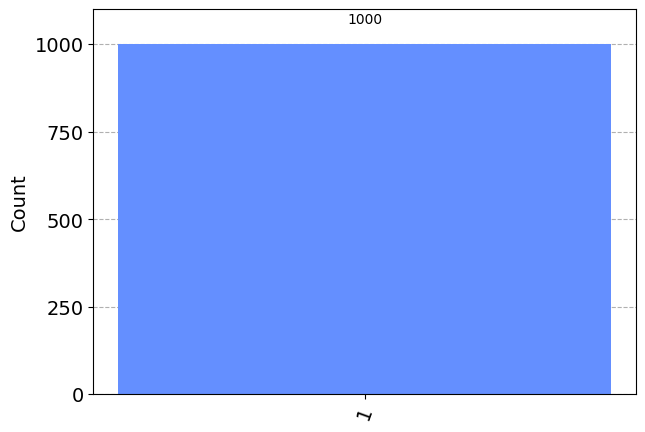

In [15]:
# Plot a histogram
plot_histogram(counts)

In [17]:
# X-gate on a |0> qubit and measurement with quantum circuit
qc_x = QuantumCircuit(2,2,name="qc") #Quantum Circuit
qc_x.x(0) # X Gate on 1st Qubit
qc_x.barrier()
qc_x.measure(0,0)
qc_x.measure(1,1)
#qc.measure([0,1], [0,1])
qc_x.draw()

┌───┐ ░ ┌─┐   
q_0: ┤ X ├─░─┤M├───
     └───┘ ░ └╥┘┌─┐
q_1: ──────░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═

In [19]:
# X-gate on a |0> qubit and measurement with measure_all()
qc = QuantumCircuit(2,name="qc") #Quantum Circuit
qc.x(0) # X Gate on 1st Qubit
qc.measure_all()
qc.draw()

┌───┐ ░ ┌─┐   
   q_0: ┤ X ├─░─┤M├───
        └───┘ ░ └╥┘┌─┐
   q_1: ──────░──╫─┤M├
              ░  ║ └╥┘
meas_0: ═════════╩══╬═
                    ║ 
meas_1: ════════════╩═

## Pauli Y Gate

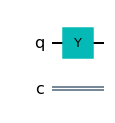

In [75]:
# Y-gate on a |0> qubit with quantum circuit
qc_y = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_y.y(0) # Y Gate on 1st Qubit
qc_y.draw('mpl')

### Plotting the Bloch Sphere for Pauli Y Gate


Quantum state is: [0.-0.j 0.+1.j]


C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


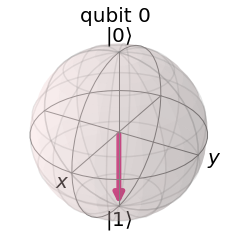

In [76]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = execute(qc_y, backend).result().get_statevector(qc_y, decimals=3)

# Printing the state after Y gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

### Printing the Unitary Operator for Pauli Y

In [77]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
y_unitary = execute(qc_y, backend)
y_unitary.result().get_unitary(qc_y, decimals=3)

array([[0.-0.j, 0.-1.j],
       [0.+1.j, 0.+0.j]])

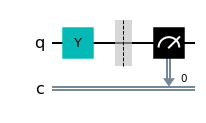

In [71]:
# Y-gate on a |0> qubit and measurement with quantum circuit
qc_y = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_y.y(0) # Y Gate on 1st Qubit
qc_y.barrier()
qc_y.measure(0,0)
qc_y.draw('mpl')

### Running the Pauli Y circuit using QASM Simulator

In [72]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc_y, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc_y)
print("\nTotal counts are:",counts)


Total counts are: {'1': 1000}


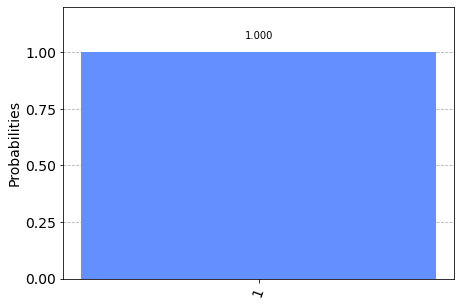

In [73]:
plot_histogram(counts)

## Pauli Z Gate

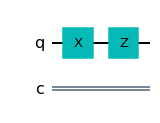

In [78]:
# Z-gate on a |0> qubit with quantum circuit
qc_z = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_z.x(0)
qc_z.z(0) # Z Gate on 1st Qubit
qc_z.draw('mpl')

### Plotting the Bloch Sphere for Pauli Z Gate


Quantum state is: [ 0.+0.j -1.+0.j]


C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


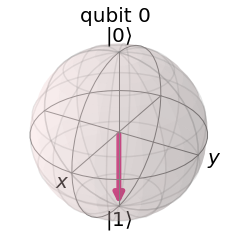

In [79]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = execute(qc_z, backend).result().get_statevector(qc_z, decimals=3)

# Printing the state after Z gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

### Printing the Unitary Operator for Pauli Z

In [80]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
z_unitary = execute(qc_z, backend)
z_unitary.result().get_unitary(qc_z, decimals=3)

array([[ 0.+0.j,  1.+0.j],
       [-1.+0.j,  0.+0.j]])

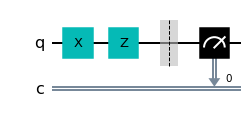

In [82]:
# Z-gate on a |0> qubit with quantum circuit
qc_z = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_z.x(0)
qc_z.z(0) # Z Gate on 1st Qubit
qc_z.barrier()
qc_z.measure(0,0)
qc_z.draw('mpl')

### Running the Pauli Z Circuit using the QASM Simulator

In [83]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc_z, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc_z)
print("\nTotal counts are:",counts)


Total counts are: {'1': 1000}


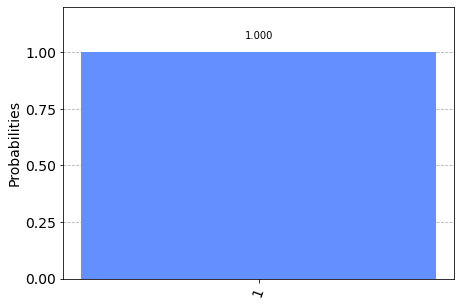

In [84]:
plot_histogram(counts)

## Hadamard Gate

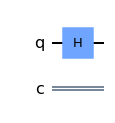

In [85]:
# H-gate on a |0> qubit with quantum circuit
qc_h = QuantumCircuit(1,1,name="qc") #Quantum Circuit
#qc_h.x(0)
qc_h.h(0) # H Gate on 1st Qubit
qc_h.draw('mpl')

### Plotting the Bloch Sphere for Hadamard Gate


Quantum state is: [0.707+0.j 0.707+0.j]


C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


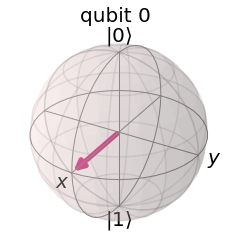

In [86]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = execute(qc_h, backend).result().get_statevector(qc_h, decimals=3)

# Printing the state after H gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

### Printing the Unitary Operator for Hadamard Gate

In [87]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
h_unitary = execute(qc_h, backend)
h_unitary.result().get_unitary(qc_h, decimals=3)

array([[ 0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j]])

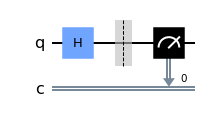

In [88]:
# H-gate on a |0> qubit with quantum circuit
qc_h = QuantumCircuit(1,1,name="qc") #Quantum Circuit
#qc_h.x(0)
qc_h.h(0) # H Gate on 1st Qubit
qc_h.barrier()
qc_h.measure(0,0)
qc_h.draw('mpl')

### Running the Hadamard Circuit using the QASM Simulator

In [89]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc_h, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc_h)
print("\nTotal counts are:",counts)


Total counts are: {'0': 480, '1': 520}


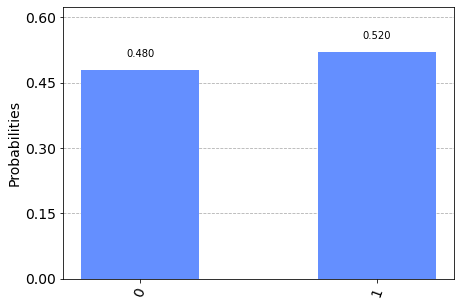

In [90]:
plot_histogram(counts)

## S Gate

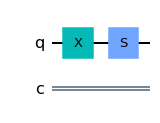

In [91]:
# S-gate on a |0> qubit with quantum circuit
qc_s = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_s.x(0)
qc_s.s(0) # S Gate on 1st Qubit
qc_s.draw('mpl')

### Plotting the Bloch Sphere for S Gate


Quantum state is: [0.-0.j 0.+1.j]


C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


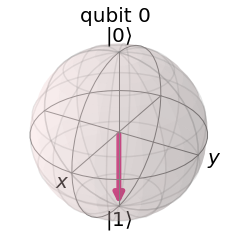

In [92]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = execute(qc_s, backend).result().get_statevector(qc_s, decimals=3)

# Printing the state after S gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

### Printing the Unitary Operator for S Gate

In [93]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
s_unitary = execute(qc_s, backend)
s_unitary.result().get_unitary(qc_s, decimals=3)

array([[0.-0.j, 1.+0.j],
       [0.+1.j, 0.-0.j]])

## S Dagger Gate

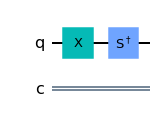

In [94]:
# S Dagger-gate on a |0> qubit with quantum circuit
qc_sdg = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_sdg.x(0)
qc_sdg.sdg(0) # S Dagger Gate on 1st Qubit
qc_sdg.draw('mpl')

### Plotting the Bloch Sphere for S Dagger Gate


Quantum state is: [0.+0.j 0.-1.j]


C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


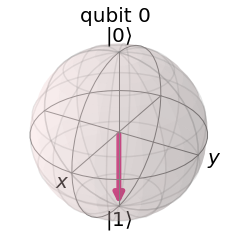

In [95]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = execute(qc_sdg, backend).result().get_statevector(qc_sdg, decimals=3)

# Printing the state after S Dagger gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

### Printing the Unitary Operator for S Dagger Gate

In [96]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
sdg_unitary = execute(qc_sdg, backend)
sdg_unitary.result().get_unitary(qc_sdg, decimals=3)

array([[0.+0.j, 1.-0.j],
       [0.-1.j, 0.+0.j]])

## T Gate

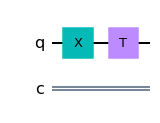

In [97]:
# T-gate on a |0> qubit with quantum circuit
qc_t = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_t.x(0)
qc_t.t(0) # T Gate on 1st Qubit
qc_t.draw('mpl')

### Plotting the Bloch Sphere for T Gate


Quantum state is: [0.   -0.j    0.707+0.707j]


C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


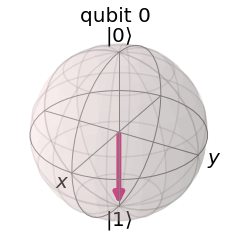

In [98]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = execute(qc_t, backend).result().get_statevector(qc_t, decimals=3)

# Printing the state after T gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

### Printing the Unitary Operator for T Gate

In [99]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
t_unitary = execute(qc_t, backend)
t_unitary.result().get_unitary(qc_t, decimals=3)

array([[0.   -0.j   , 1.   +0.j   ],
       [0.707+0.707j, 0.   -0.j   ]])

## T Dagger Gate

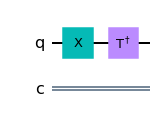

In [100]:
# T Dagger-gate on a |0> qubit with quantum circuit
qc_tdg = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_tdg.x(0)
qc_tdg.tdg(0) # T Dagger Gate on 1st Qubit
qc_tdg.draw('mpl')

### Plotting the Bloch Sphere for T Dagger Gate


Quantum state is: [0.   +0.j    0.707-0.707j]


C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


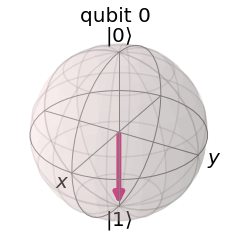

In [101]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = execute(qc_tdg, backend).result().get_statevector(qc_tdg, decimals=3)

# Printing the state after T Dagger gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

### Printing the Unitary Operator for T Dagger Gate

In [102]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
tdg_unitary = execute(qc_tdg, backend)
tdg_unitary.result().get_unitary(qc_tdg, decimals=3)

array([[0.   +0.j   , 1.   -0.j   ],
       [0.707-0.707j, 0.   +0.j   ]])

## Rx Gate

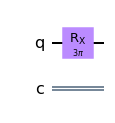

In [121]:
# RX Gate
theta_x = 3*pi
qc_rx = QuantumCircuit(1,1,name="qc")
qc_rx.rx(theta_x,0)
qc_rx.draw(output='mpl')

### Plotting the Bloch Sphere for Rx Gate


Quantum state is: [-0.+0.j  0.+1.j]


C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


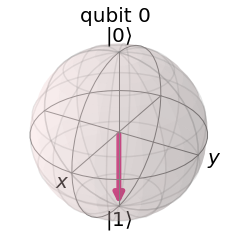

In [122]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = execute(qc_rx, backend).result().get_statevector(qc_rx, decimals=3)

# Printing the state after Rx gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

### Printing the Unitary Operator for Rx Gate

In [123]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
rx_unitary = execute(qc_rx, backend)
rx_unitary.result().get_unitary(qc_rx, decimals=3)

array([[-0.+0.j,  0.+1.j],
       [ 0.+1.j, -0.+0.j]])

## Ry Gate

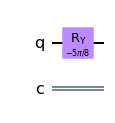

In [139]:
# RY Gate
theta_y = -5*pi/8
qc_ry = QuantumCircuit(1,1,name="qc")
qc_ry.ry(theta_y,0)
qc_ry.draw(output='mpl')

### Plotting the Bloch Sphere for Ry Gate


Quantum state is: [ 0.556+0.j -0.831+0.j]


C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


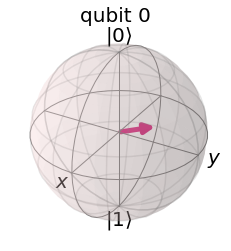

In [140]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = execute(qc_ry, backend).result().get_statevector(qc_ry, decimals=3)

# Printing the state after Ry gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

### Printing the Unitary Operator for Ry Gate

In [134]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
ry_unitary = execute(qc_ry, backend)
ry_unitary.result().get_unitary(qc_ry, decimals=3)

array([[ 0.981+0.j, -0.195+0.j],
       [ 0.195+0.j,  0.981+0.j]])

## Rz Gate

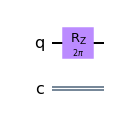

In [182]:
# RZ Gate
theta_z = 2*pi
qc_rz = QuantumCircuit(1,1,name="qc")
#qc_rz.x(0)
qc_rz.rz(theta_z,0)
qc_rz.draw(output='mpl')

### Plotting the Bloch Sphere for Rz Gate


Quantum state is: [-1.-0.j -0.+0.j]


C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


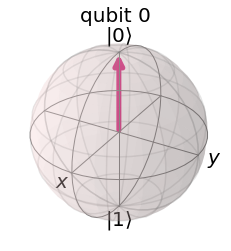

In [183]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = execute(qc_rz, backend).result().get_statevector(qc_rz, decimals=3)

# Printing the state after Rz gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

### Printing the Unitary Operator for Rz Gate

In [184]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
rz_unitary = execute(qc_rz, backend)
rz_unitary.result().get_unitary(qc_rz, decimals=3)

array([[-1.-0.j,  0.-0.j],
       [-0.+0.j, -1.+0.j]])

## U Gate or U3 Gate

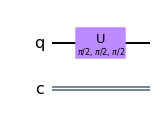

In [189]:
# U Gate or U3 Gate
qc_u = QuantumCircuit(1, 1, name="qc")
qc_u.u(pi/2,pi/2,pi/2,0)
qc_u.draw('mpl')

### Plotting the Bloch Sphere for U Gate


Quantum state is: [0.707+0.j    0.   +0.707j]


C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


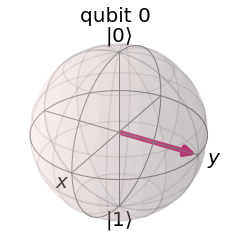

In [190]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = execute(qc_u, backend).result().get_statevector(qc_u, decimals=3)

# Printing the state after U gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

### Printing the Unitary Operator for U Gate

In [191]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
u_unitary = execute(qc_u, backend)
u_unitary.result().get_unitary(qc_u, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

## U2 Gate - First Angle of U Gate = pi/2 fixed

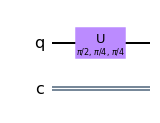

In [194]:
# U2 Gate
qc_u2 = QuantumCircuit(1, 1, name="qc")
qc_u2.u(pi/2,pi/4,pi/4,0)
qc_u2.draw('mpl')

### Plotting the Bloch Sphere for U2 Gate


Quantum state is: [0.707+0.j  0.5  +0.5j]


C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


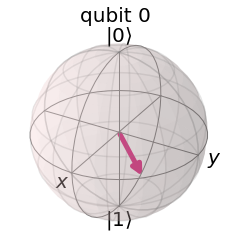

In [195]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = execute(qc_u2, backend).result().get_statevector(qc_u2, decimals=3)

# Printing the state after U2 gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

### Printing the Unitary Operator for U2 Gate

In [196]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
u2_unitary = execute(qc_u2, backend)
u2_unitary.result().get_unitary(qc_u2, decimals=3)

array([[ 0.707+0.j   , -0.5  -0.5j  ],
       [ 0.5  +0.5j  ,  0.   +0.707j]])

## U1 Gate = P Gate (Phase Gate)

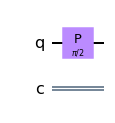

In [198]:
# U1 Gate = P Gate
qc_u1 = QuantumCircuit(1, 1, name="qc")
qc_u1.p(pi/2,0)
qc_u1.draw('mpl')

### Plotting the Bloch Sphere for U1 or P Gate


Quantum state is: [1.+0.j 0.+0.j]


C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


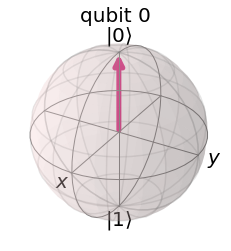

In [200]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = execute(qc_u1, backend).result().get_statevector(qc_u1, decimals=3)

# Printing the state after U1 or P gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

### Printing the Unitary Operator for U1 or P Gate

In [201]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

# Execute the circuit
u1_unitary = execute(qc_u1, backend)
u1_unitary.result().get_unitary(qc_u1, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])